# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipyleaflet import Map, basemaps, Marker, LayerGroup, CircleMarker, WidgetControl

# This CSV file contains semicolons instead of comas as separator
data_set = pd.read_csv('assets/real_estate.csv', sep=';')
data_set

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [6]:
def get_address_with_price(data_frame : pd.DataFrame, price_value : np.int64) -> str:
    #Find the column of the highest price house. Using the head() function to prevent multiple values
    price_row = data_frame.loc[data_frame['price'] == price_value].head(1)
    #Converting the adress value to a String and modifying it for visuals
    return price_row['address'].to_string().replace(' ', ', ', 1)

max_price = data_set['price'].max()

print(f"The house at {get_address_with_price(data_set, max_price)} is the most expensive and its price is {max_price} USD")


The house at 13110,    El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [7]:
min_price = data_set['price'].min()

print(f"The house at {get_address_with_price(data_set, min_price)} is the cheapest and its price is {min_price} USD")

The house at 366,    Parla is the cheapest and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [8]:
def get_address_with_surface(data_frame : pd.DataFrame, surface_value : np.int64) -> str:
    #Find the column of the biggest surface house. Using the head() function to prevent multiple values
    surface_row = data_frame.loc[data_frame['surface'] == surface_value].head(1)
    #Converting the adress value to a String and modifying it for visuals
    return surface_row['address'].to_string().replace(' ', ',', 1)


biggest_surface = data_set['surface'].max()


smallest_surface = data_set['surface'].min()

print(f"The biggest house is located on {get_address_with_surface(data_set, biggest_surface)} and its surface is {biggest_surface} meters")
print(f"The smallest house is located on {get_address_with_surface(data_set, smallest_surface)} and its surface is {smallest_surface} meters")


The biggest house is located on 6794,   Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is located on 498,   Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [10]:
populations = data_set['level5'].drop_duplicates()

def get_population_names() -> str:
    #Removing duplicate populations
    populations_string = ''
    #Looping through the new list to add commas
    for item in populations:
        populations_string += f"{item}, "
    return populations_string


print('Populations: ',get_population_names(), '\n')

Populations:  Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas 

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [11]:
def check_NAs():
    NAs_in_dataset = data_set.isnull().sum().sum()
    if NAs_in_dataset > 0:
        print(True)
        NAs_in_cols = []
        for column in data_set.columns:
            if data_set[column].isnull().values.any():
                NAs_in_cols.append(column)
        print(f"The data set contains {NAs_in_dataset} NaNs in columns : {', '.join(NAs_in_cols)}")
    else:
        print(False)
check_NAs()

True
The data set contains 65690 NaNs in columns : realEstate_name, phone_realEstate, rooms, bathrooms, surface, description, level4, level6, level7, level8, zipCode, customZone


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [13]:
#Removing columns with missing values
clean_data_set = data_set.dropna(axis = 1)
print('Dimensions before cleaning: ', data_set.shape, '\n', 'Dimensions after cleaning: ', clean_data_set.shape)


Dimensions before cleaning:  (15335, 37) 
 Dimensions after cleaning:  (15335, 25)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [14]:
selected_rows = data_set.loc[data_set['level5'] == 'Arroyomolinos (Madrid)']
print(f"The mean of the prices in the population 'Arroyomolinos (Madrid)' is {selected_rows.price.mean(skipna = True)}")


The mean of the prices in the population 'Arroyomolinos (Madrid)' is 294541.59854014596


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

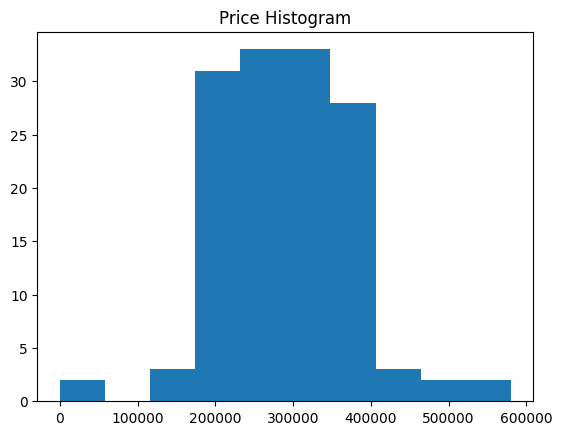

In [16]:
plt.hist(selected_rows.price)
plt.title('Price Histogram')
plt.savefig('plots/Histogram.png')
plt.show()



#Conclusion:  The majority of the data falls into 300000

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [17]:
def get_population_mean(target_pop : str, target_column : str) -> float:
    selected_rows = data_set.loc[data_set['level5'] == target_pop]
    return selected_rows[target_column].mean(skipna = True)


avg_price_1 = get_population_mean('Valdemorillo', 'price')
avg_price_2 = get_population_mean('Galapagar', 'price')

print(f"The average prices in 'Valdemorillo' ({str(avg_price_1)}) and 'Galapagar' ({avg_price_2}) are {'the same' if avg_price_1 == avg_price_2 else 'different'}")


The average prices in 'Valdemorillo' (363860.2931034483) and 'Galapagar' (360063.20238095237) are different


#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [18]:
data_set['pps'] = data_set.price / (data_set.surface * 2)
avg_pps_1 = get_population_mean('Valdemorillo', 'pps')
avg_pps_2 = get_population_mean('Galapagar', 'pps')

print(f"The average price per square meter in 'Valdemorillo' ({str(avg_pps_1)}) and 'Galapagar' ({avg_pps_2}) are {'the same' if avg_price_1 == avg_price_2 else 'different'}")


The average price per square meter in 'Valdemorillo' (658.9751054512493) and 'Galapagar' (803.1620151547012) are different


#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

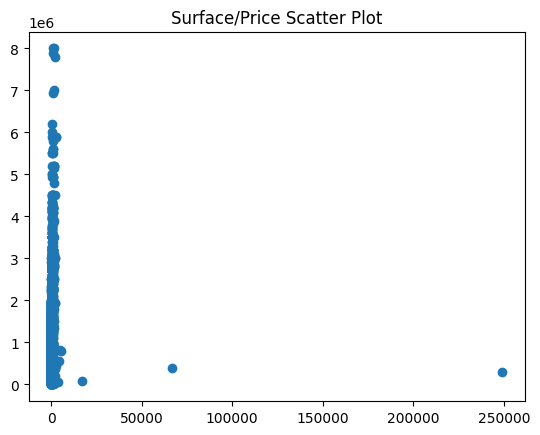

In [19]:
plt.scatter(data_set.surface, data_set.price)
plt.title('Surface/Price Scatter Plot')
plt.savefig('plots/Scatter Plot.png')
plt.show()



#Conclusion: The surface remains constant as the price increases, with a few exceptions

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [20]:
print(f"The data set contains {len(data_set['realEstate_name'].drop_duplicates())} real estate agencies")


The data set contains 1822 real estate agencies


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [22]:
pop_with_most_houses = ''
highest_pop_count = 0
for pop in populations:
    selected_pop = len(data_set.loc[data_set['level5'] == pop])
    if selected_pop > highest_pop_count:
        highest_pop_count = selected_pop
        pop_with_most_houses = pop
num_of_houses = len(data_set.loc[data_set['level5'] == pop_with_most_houses])
print(f"The population with most houses is {pop_with_most_houses} with {str(num_of_houses)} houses")


The population with most houses is  Madrid Capital with 6643 houses


#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [23]:
south_belt_df = data_set.query('level5 == ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]')


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

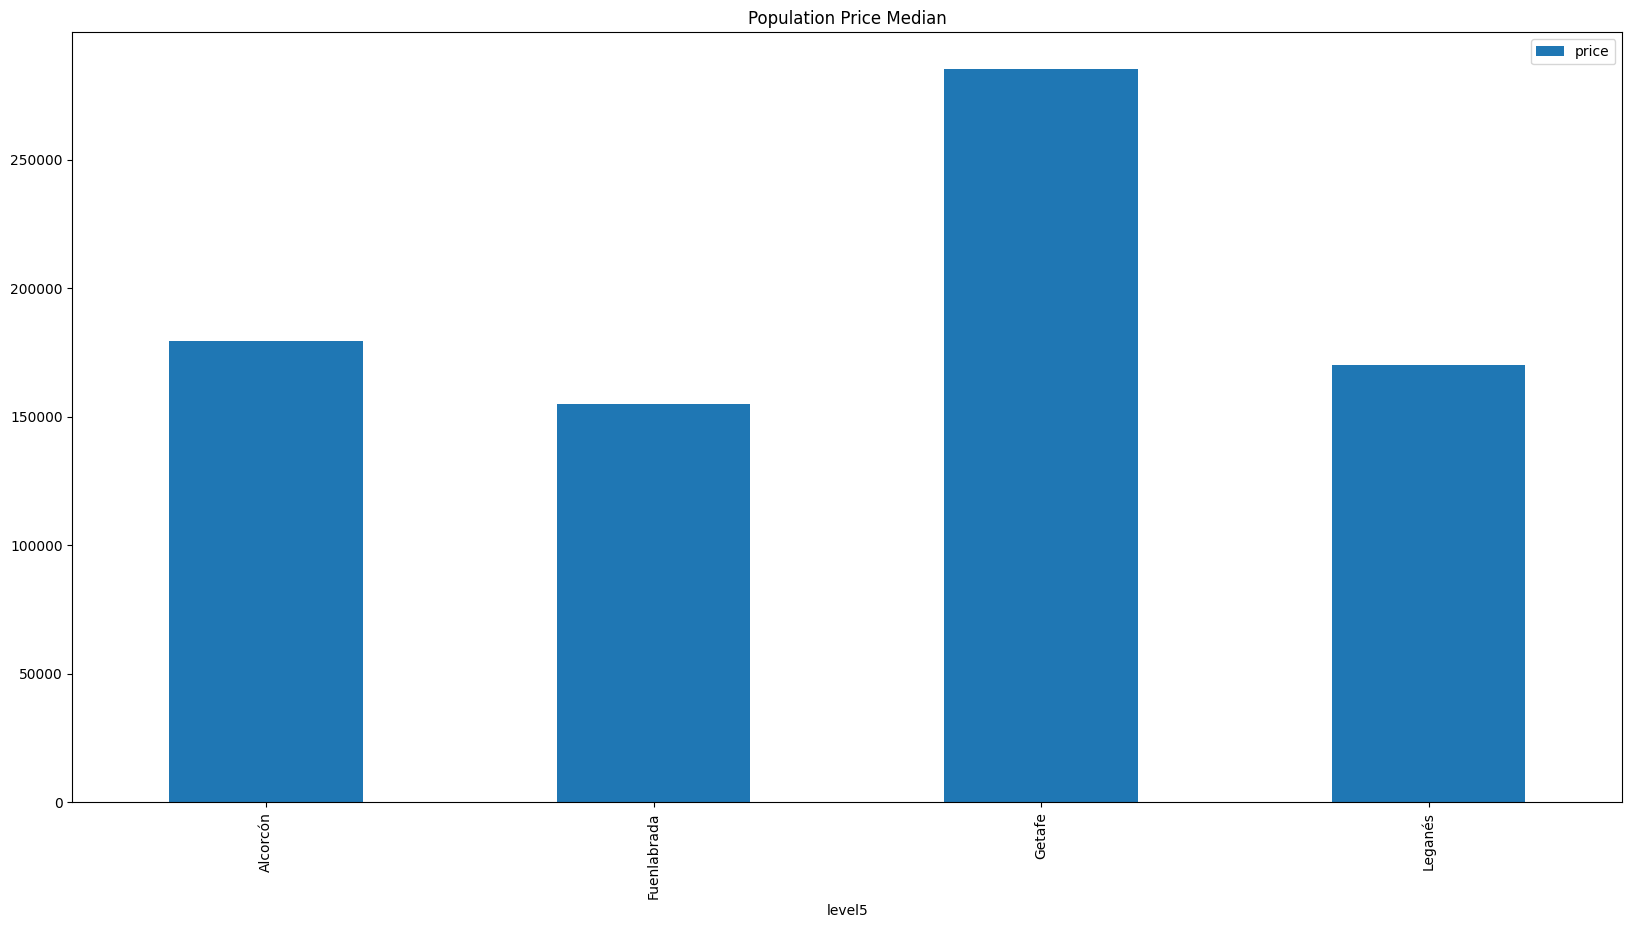

In [24]:
median_values = south_belt_df.groupby('level5')['price'].median()
median_values_df = pd.DataFrame(median_values)
bar_plot = median_values_df.plot.bar(figsize=(20, 10))
plt.title('Population Price Median')
plt.savefig('plots/Bar Plot.png')

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [25]:
def calc_mean_of_column(data_frame : pd.DataFrame, column_name : str):
    return data_frame[column_name].mean()

def calc_variance_of_column(data_frame : pd.DataFrame, column_name : str):
    return data_frame[column_name].var()

for col in ['price', 'rooms', 'surface', 'bathrooms']:
    print(f"The mean of {col} is {str(calc_mean_of_column(south_belt_df, col))} and its variation is {str(calc_variance_of_column(south_belt_df, col))}")


The mean of price is 223094.48070562293 and its variation is 14921367508.04902
The mean of rooms is 3.0177383592017737 and its variation is 0.7188858892927542
The mean of surface is 111.75222363405337 and its variation is 4263.051760316337
The mean of bathrooms is 1.633221850613155 and its variation is 0.5717968625577321


#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [26]:
for pop in south_belt_df.level5.drop_duplicates():
    max_price = south_belt_df.loc[south_belt_df['level5'] == pop]['price'].max()
    print(f"The most expensive house in {pop} is {get_address_with_price(south_belt_df, max_price)} with a price of {str(max_price)}")


The most expensive house in Fuenlabrada is 11561,    Calle de Paulo Freire, 5, Fuenlabrada with a price of 490000
The most expensive house in Alcorcón is 5585,    Alcorcón with a price of 950000
The most expensive house in Leganés is 10412,    Avenida Reina Sofía, Leganés with a price of 650000
The most expensive house in Getafe is 2881,    Getafe with a price of 1050000


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

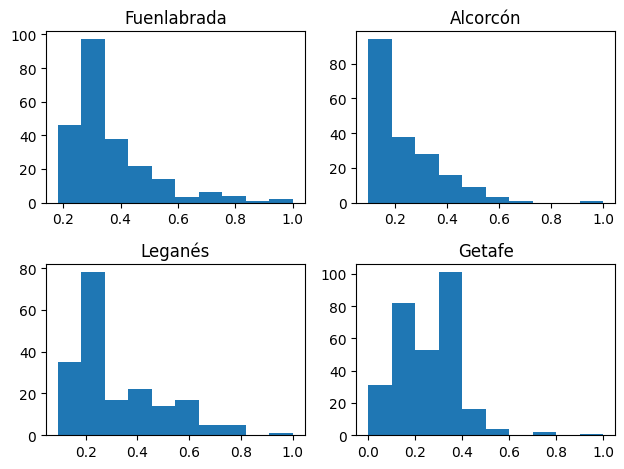

In [27]:
normalized_values = []
south_belt_df_scaled = south_belt_df.copy()
for pop in south_belt_df.level5.drop_duplicates():
    normalized_pop_group = south_belt_df.loc[south_belt_df['level5'] == pop]['price']  / south_belt_df.loc[south_belt_df['level5'] == pop]['price'].abs().max()
    normalized_values.append(pd.DataFrame(normalized_pop_group).to_numpy())

fig, axes = plt.subplots(nrows=2, ncols=2)
n_bins = 10
ax0, ax1, ax2, ax3 = axes.flat
plot_titles = south_belt_df.level5.drop_duplicates().values

ax0.hist(normalized_values[0], n_bins, histtype='bar')
ax0.set_title(plot_titles[0])

ax1.hist(normalized_values[1], n_bins, histtype='bar')
ax1.set_title(plot_titles[1])

ax2.hist(normalized_values[2], n_bins, histtype='bar')
ax2.set_title(plot_titles[2])

ax3.hist(normalized_values[3], n_bins, histtype='bar')
ax3.set_title(plot_titles[3])

plt.tight_layout()
plt.savefig('plots/MultiHistogram.png')
plt.show()


**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [28]:
pps_mean1 = south_belt_df.loc[south_belt_df['level5'] == 'Getafe']['pps'].mean()
pps_mean2 = south_belt_df.loc[south_belt_df['level5'] == 'Alcorcón']['pps'].mean()

if pps_mean1 > pps_mean2:
    print(f"The price per square meter mean in Getafe({pps_mean1}) is greater than the value in Alcorcón({pps_mean2})")
else:
    print(f"The price per square meter mean in Alcorcón({pps_mean2}) is greater than the value in Getafe({pps_mean1})")
    

The price per square meter mean in Alcorcón(1119.651240099809) is greater than the value in Getafe(1033.1574746257315)


#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

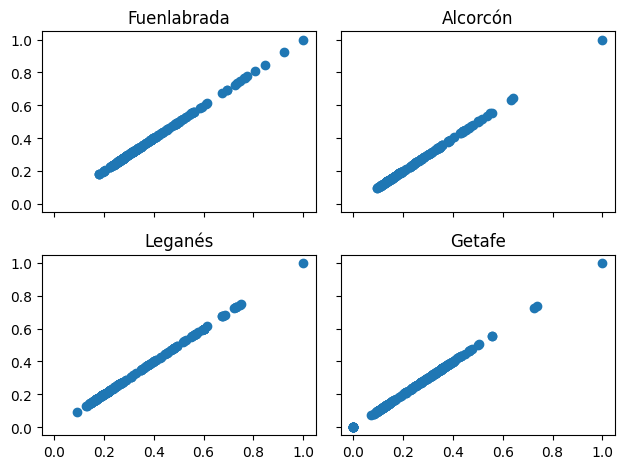

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
ax0, ax1, ax2, ax3 = axes.flat

ax0.scatter(normalized_values[0], normalized_values[0])
ax0.set_title(plot_titles[0])

ax1.scatter(normalized_values[1], normalized_values[1])
ax1.set_title(plot_titles[1])

ax2.scatter(normalized_values[2], normalized_values[2])
ax2.set_title(plot_titles[2])

ax3.scatter(normalized_values[3], normalized_values[3])
ax3.set_title(plot_titles[3])

plt.tight_layout()
plt.savefig('plots/MultiScatterPlot.png')
plt.show()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [37]:


# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
ds = pd.read_csv('assets/real_estate.csv', sep=';')
data_frame = pd.DataFrame(ds)
populations = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
subset = data_frame[data_frame['level5'].isin(populations)]
x = subset['latitude'].str.replace(',', '.').astype(float).to_list()
y = subset['longitude'].str.replace(',', '.').astype(float).to_list()
population_coord = subset.groupby('level5').apply(lambda x: x[['latitude', 'longitude']].to_dict(orient='records')).to_dict()
colors = {
    'Fuenlabrada': 'red',
    'Leganés': 'blue',
    'Getafe': 'green',
    'Alcorcón': 'purple'
}
madrid_map = Map(center=(40.4168, -3.7038), zoom=12, basemap=basemaps.OpenStreetMap.Mapnik)
for population, coords in population_coord.items():
    for coord in coords:
        marker = CircleMarker(location=(coord['latitude'], coord['longitude']),
                              radius=5,
                              color=colors[population],
                              fill=True,
                              fill_color=colors[population])
        madrid_map.add_layer(marker)

madrid_map

/tmp/ipykernel_1757/414797405.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  population_coord = subset.groupby('level5').apply(lambda x: x[['latitude', 'longitude']].to_dict(orient='records')).to_dict()


Map(center=[40.4168, -3.7038], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…